In [16]:
import numpy as np # handling arrays
import pandas as pd # converting csv files to dataframes
import matplotlib.pyplot as plt  # data visualisation

# scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# useful tensorflow functions
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

In [17]:
from tensorflow.random import set_seed
from random import seed
SEED = 7
seed(SEED)
np.random.seed(SEED)
set_seed(SEED)


In [18]:
flower_data = pd.read_csv('flower_data.csv')

In [19]:
missing_data = flower_data.isnull().sum()
print(missing_data)

X1    0
X2    0
y     0
dtype: int64


In [20]:
X = flower_data[["X1", "X2"]]  # features
y = flower_data["y"]  # target

X.head()

,X1,X2
0,1.204442,3.576114
1,0.158710,-1.482171
2,0.095247,-1.279955
3,0.349178,-2.064380
4,0.694150,2.889109


In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X[:5]

array([[ 0.63420451,  1.75063021],
       [ 0.10269748, -0.77397841],
       [ 0.07044174, -0.67305187],
       [ 0.1995056 , -1.06456109],
       [ 0.37484204,  1.40774331]])

In [22]:
# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.35)

In [23]:
model = Sequential([
    Input(shape=(2,)),  # Specify the input shape here
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')])

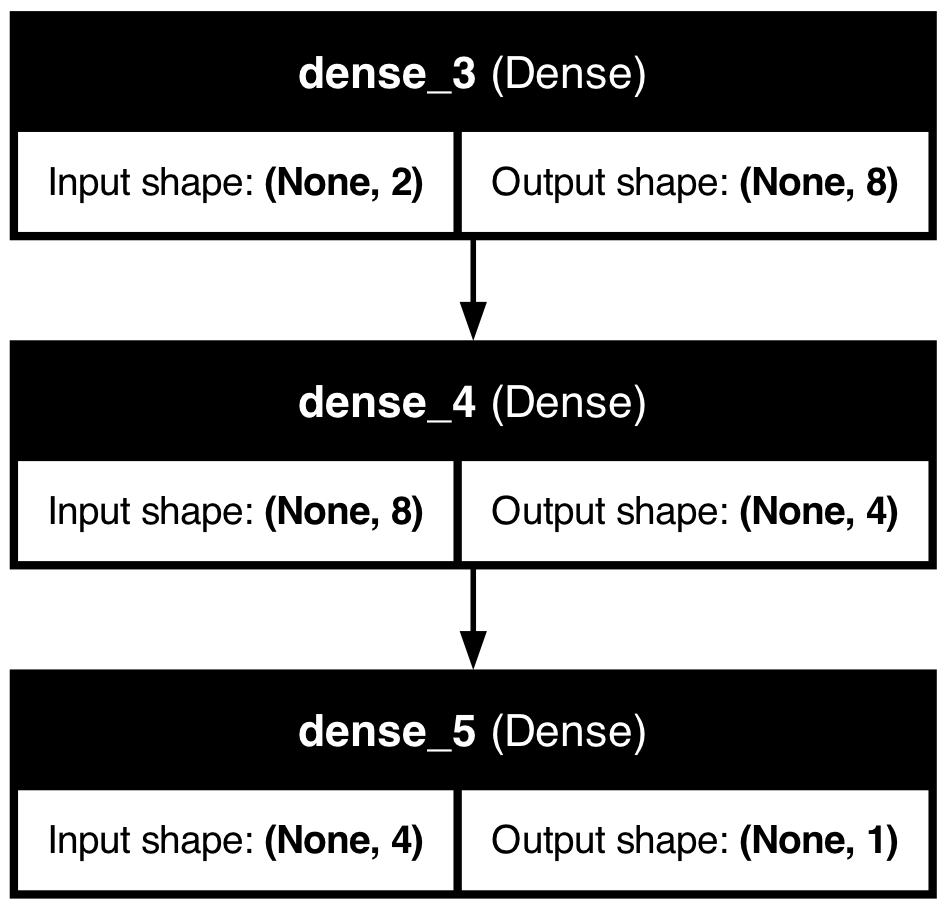

In [24]:
# plot of the created model
plot_model(model, to_file='model_plot.png', show_shapes=True,
    show_layer_names=True)

In [25]:
# compile the model
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit model
hist = model.fit(X_train, y_train, epochs = 200, batch_size = 50, validation_data = (X_val, y_val), verbose=0)

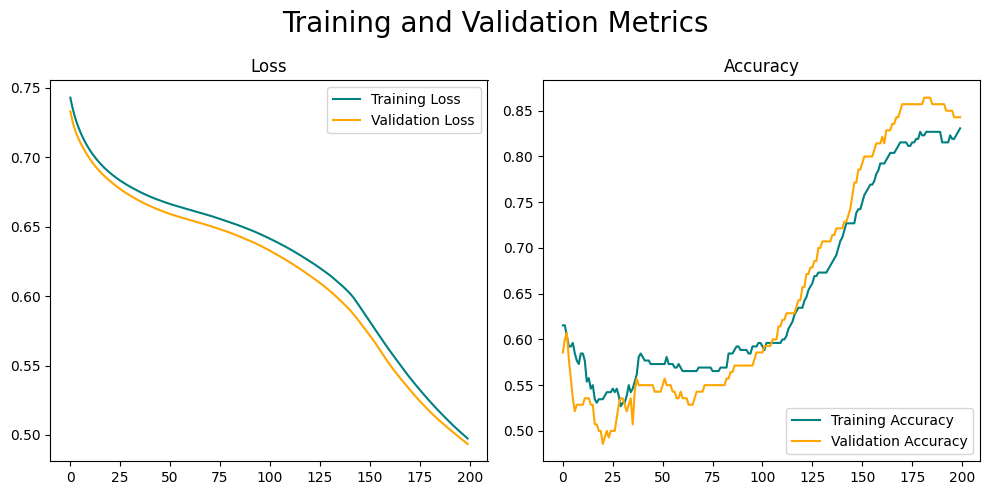

In [26]:
# Plotting training and validation loss over epochs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training and validation loss
axes[0].plot(hist.history['loss'], color='teal', label='Training Loss')
axes[0].plot(hist.history['val_loss'], color='orange', label='Validation Loss')
axes[0].set_title('Loss')
axes[0].legend(loc='upper right')

# Plot training and validation accuracy
axes[1].plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
axes[1].plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].legend(loc='lower right')

fig.suptitle('Training and Validation Metrics', fontsize=20)
plt.tight_layout()
plt.show()

In [27]:
# evaluate the model
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Loss: {:.3f}\nAccuracy: {:.3f}'.format(loss, acc))

Loss: 0.494
Accuracy: 0.843


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


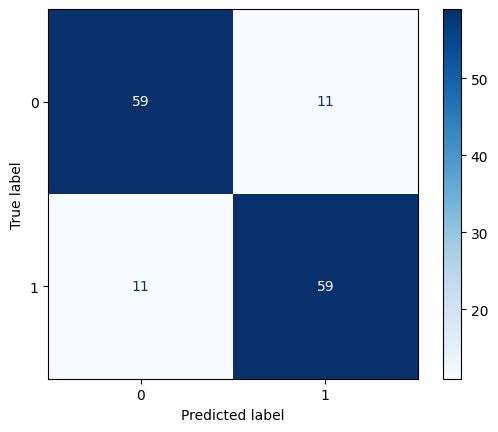

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
